#### Explore what's gwanning

CRISP-DM Process:
1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy

# Project Description

The data for this comeptition comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water.

In their own words:

```Taarifa is an open source platform for the crowd sourced reporting and triaging of infrastructure related issues. Think of it as a bug tracker for the real world which helps to engage citizens with their local government. We are currently working on an Innovation Project in Tanzania, with various partners.```

# Problem Statement

Use the following data to predict whether a well is functional, non-functional but repairable, or non-functional.

##### Description of Data Given
3 files have been provided: training_labels, training_values, test_values

Must submit to see accuracy?

Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

+ `amount_tsh` - Total static head (amount water available to waterpoint)
+ `date_recorded` - The date the row was entered
+ `funder` - Who funded the well
+ `gps_height` - Altitude of the well
+ `installer` - Organization that installed the well
+ `longitude` - GPS coordinate
+ `latitude` - GPS coordinate
+ `wpt_name` - Name of the waterpoint if there is one
+ `num_private` -
+ `basin` - Geographic water basin
+ `subvillage` - Geographic location
+ `region` - Geographic location
+ `region_code` - Geographic location (coded)
+ `district_code` - Geographic location (coded)
+ `lga` - Geographic location
+ `ward` - Geographic location
+ `population` - Population around the well
+ `public_meeting` - True/False
+ `recorded_by` - Group entering this row of data
+ `scheme_management` - Who operates the waterpoint
+ `scheme_name` - Who operates the waterpoint
+ `permit` - If the waterpoint is permitted
+ `construction_year` - Year the waterpoint was constructed
+ `extraction_type` - The kind of extraction the waterpoint uses
+ `extraction_type_group` - The kind of extraction the waterpoint uses
+ `extraction_type_class` - The kind of extraction the waterpoint uses
+ `management` - How the waterpoint is managed
+ `management_group` - How the waterpoint is managed
+ `payment` - What the water costs
+ `payment_type` - What the water costs
+ `water_quality` - The quality of the water
+ `quality_group` - The quality of the water
+ `quantity` - The quantity of water
+ `quantity_group` - The quantity of water
+ `source` - The source of the water
+ `source_type` - The source of the water
+ `source_class` - The source of the water
+ `waterpoint_type` - The kind of waterpoint
+ `waterpoint_type_group` - The kind of waterpoint


In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_style('darkgrid')
#try plotly and cufflinks later

import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True) 

# Data Exploration
+ Answer questions
+ Visual data
+ Any other data we can match?
+ Visualize on Map


Exploration Questions:
+ __What area has the most wells?__
    + Top 5:
        + Iringa           5294
        + Shinyanga        4982
        + Mbeya            4639
        + Kilimanjaro      4379
        + Morogoro         4006
+ __Do dates matter?__
    + Idk
+ __What features have the strongest co-relation with functionality?__
    + turns out none of the numerical Data sets have any strong co-relations at the moment, we will revisit this once we clean the data up
+ __What area has the most non-functional but replacable wells?__
+ __Is any well counted more than once?__
+ + There's not duplicate Id's
+ __Map__
+ 

In [3]:
training_labels = pd.read_csv('pump_it_up/training_labels.csv')
training_values = pd.read_csv('pump_it_up/training_values.csv')

In [4]:
training_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
training_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
# Are they good to concatinate?
training_values.shape

(59400, 40)

In [7]:
training_labels.shape

(59400, 2)

In [8]:
# yes
well_data = pd.concat([training_labels,training_values],axis=1)


,id,status_group,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [10]:
well_data.describe()

,id,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [205]:
well_data.info()
#Most of the data isn't numeric so we are going to have to do some cleaning and feature engineering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
id                       59400 non-null int64
status_group             59400 non-null object
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
p

In [161]:
well_data['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

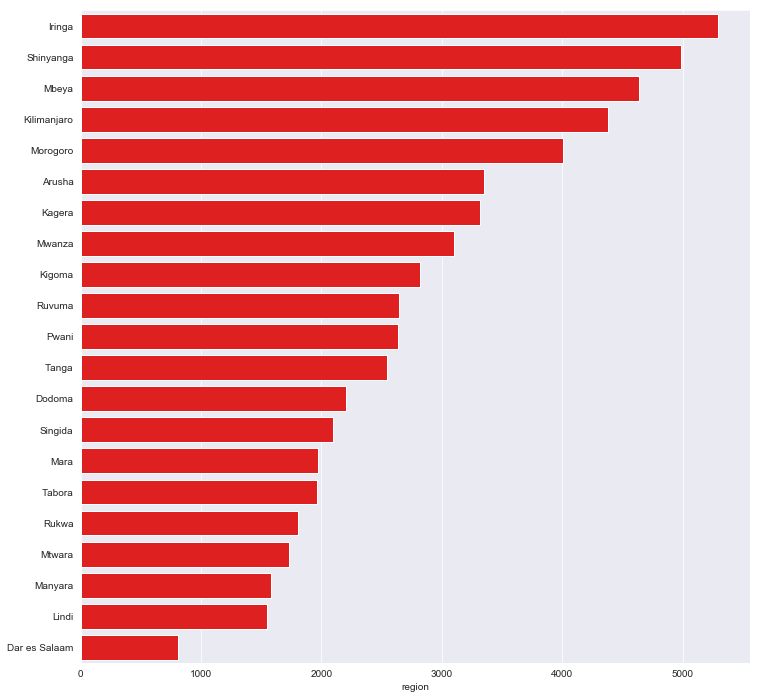

In [69]:
#Figure out how tf to plot the above
fig,axes = plt.pyplot.subplots(figsize=(12,12))
yup = sns.barplot(y=well_data['region'].value_counts().index, x=well_data['region'].value_counts(),color='red')

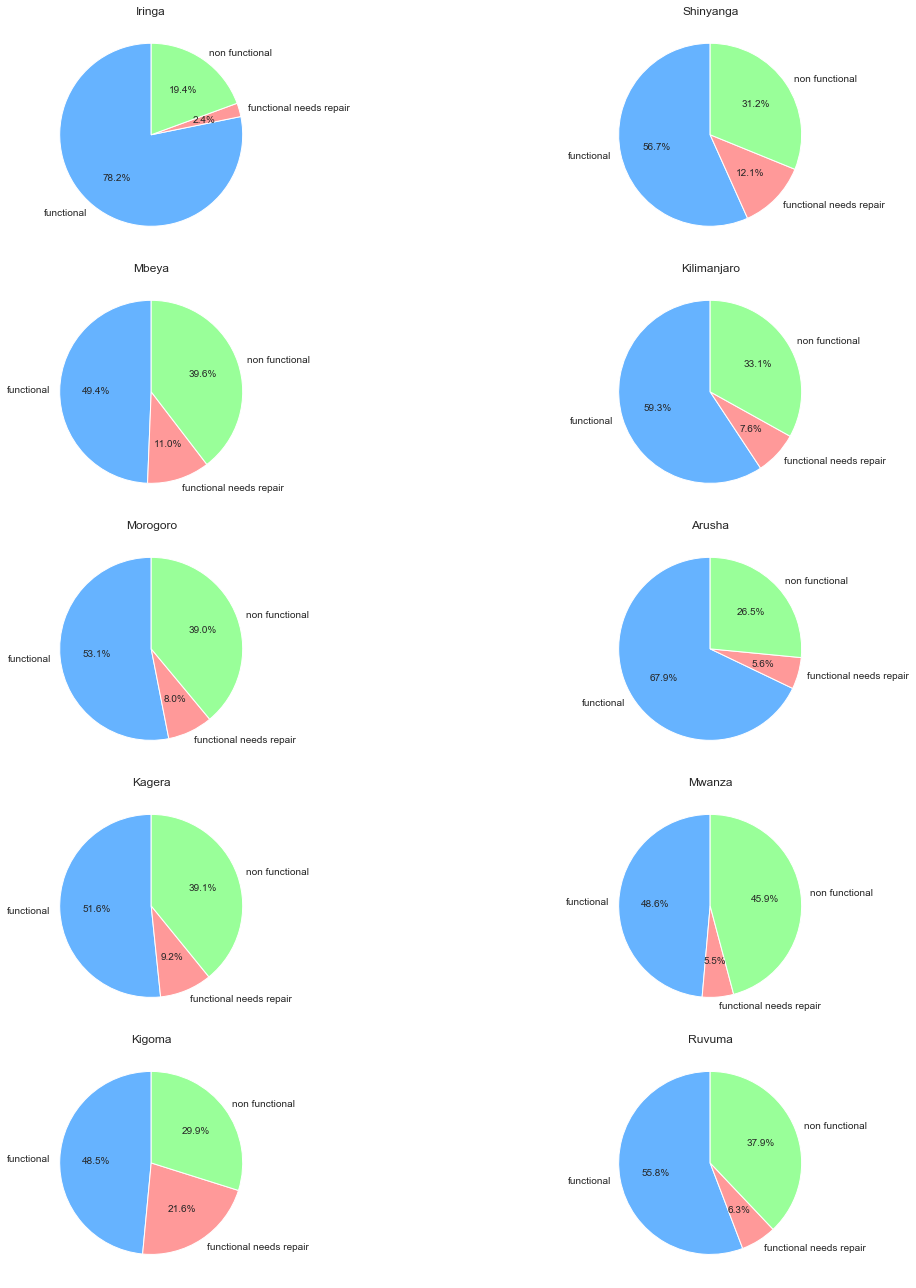

In [196]:
# Make figure and axes
fig, axs = plt.subplots(5, 2,figsize=(18,18))
sums = well_data.groupby(well_data.status_group).sum()['amount_tsh']
region_array = well_data['region'].value_counts().index[:10]

region_index = 0
colors=['#66b3ff','#ff9999','#99ff99','#ffcc99']

for i in range(5):
    sums = well_data[well_data['region']==region_array[region_index]].groupby(well_data.status_group).sum()['id'].iloc[:, :1]
    axs[i,0].pie(sums,labels=sums.index,colors=colors,autopct='%1.1f%%', startangle=90)
    axs[i,0].set_title(region_array[region_index])
    region_index+=1
    
    sums = well_data[well_data['region']==region_array[region_index]].groupby(well_data.status_group).sum()['id'].iloc[:, :1]
    axs[i,1].pie(sums,labels=sums.index,colors=colors,autopct='%1.1f%%', startangle=90)
    axs[i,1].set_title(region_array[region_index])
    region_index+=1


fig
plt.tight_layout()



In [157]:
# Plot on map (How does this effect dates? idk we're just treating this as all unique un related observations)

In [158]:
wellByRegion = well_data.groupby('region')

In [159]:
# STACK BUT AMOUNTS THAT ARE AND AREN'T FUNCTIONAL BY REGION

In [ ]:
# SEARCH INTO DUPLICATES ISSUE
'''

# How do we find if any rows have the same two latitude and longitudes

ids = well_data[["longitude",'latitude','region','funder','construction_year']]
yo = well_data[ids.duplicated()]

#pd.set_eng_float_format(accuracy=5)
print('These are the rows of observations with unique longitude,latitude,region,funder,construction_year')
yo[['region','status_group',"longitude",'latitude','funder','construction_year','date_recorded']].shape

# Let's try merging the three most important indicators and trying unique on them

# Okay it can't be unique
# How many days 

# Since there is no way of actually knowing what is going on;
# Should we just treat them uniquely? Does this even change anything?


len(well_data['date_recorded'].unique())

'''

##### What factors have the highest co-relation with functionality?

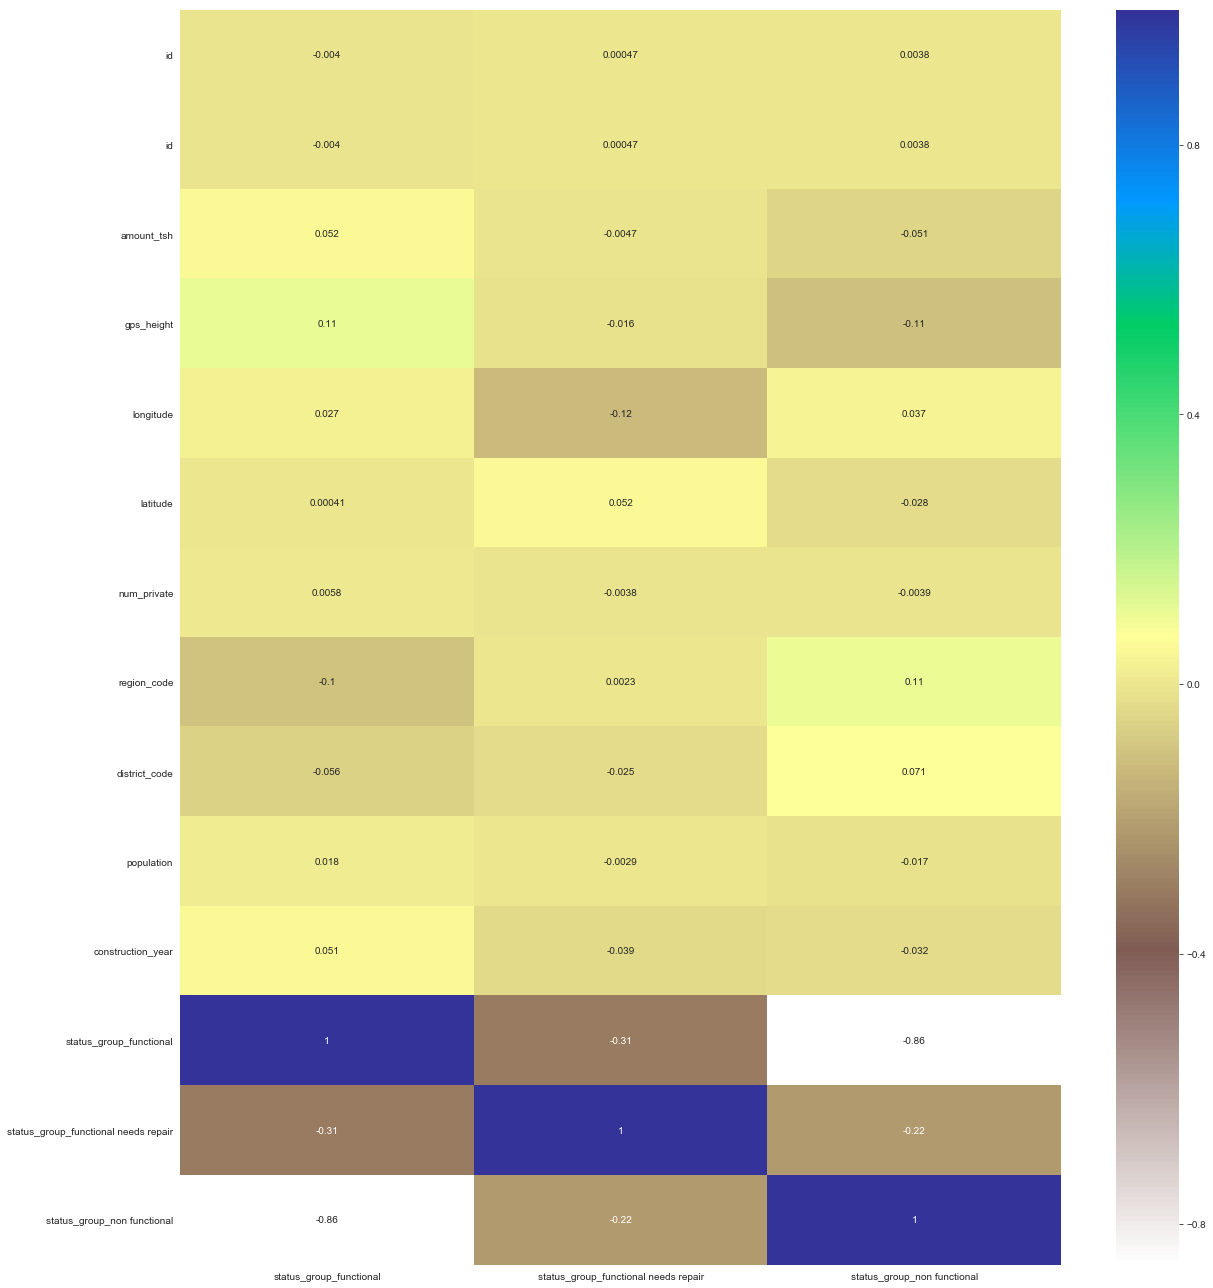

In [206]:


# Turn status into numerical outputs
fig,axes = plt.subplots(figsize=(18,18))
df = pd.get_dummies(well_data, columns=['status_group'])

correlation = df.corr()[['status_group_functional','status_group_functional needs repair','status_group_non functional']]

sns.heatmap(correlation,cmap='terrain_r',annot=True)

plt.tight_layout()



It seems like there is no significant numerical co-relation between the given numerical values and functionality

Let's explore how things change amongst the status groups

In [70]:
well_data.groupby('status_group').describe().transpose()

status_group                functional  functional needs repair  \
amount_tsh        count   32259.000000              4317.000000   
                  mean      461.798235               267.071577   
                  std      3889.735284              1925.026420   
                  min         0.000000                 0.000000   
                  25%         0.000000                 0.000000   
                  50%         0.000000                 0.000000   
                  75%        50.000000                50.000000   
                  max    350000.000000            100000.000000   
construction_year count   32259.000000              4317.000000   
                  mean     1345.567718              1168.406764   
                  std       938.407231               983.063724   
                  min         0.000000                 0.000000   
                  25%         0.000000                 0.000000   
                  50%      1995.000000              1978.000000   
                  75%      2007.000000              2000.000000   
                  max      2013.000000              2013.000000   
district_code     count   32259.000000              4317.000000   
                  mean        5.134660                 4.759092   
                  std         8.467026                 8.062250   
                  min         0.000000                 0.000000   
                  25%         2.000000                 1.000000   
                  50%         3.000000                 3.000000   
                  75%         5.000000                 4.000000   
                  max        80.000000                80.000000   
gps_height        count   32259.000000              4317.000000   
                  mean      740.131188               627.607135   
                  std       724.193683               648.397850   
                  min       -90.000000               -51.000000   
                  25%         0.000000                 0.000000   
                  50%       550.000000               385.000000   
...                                ...                      ...   
longitude         std         6.200054                10.169667   
                  min         0.000000                 0.000000   
                  25%        33.368557                30.799300   
                  50%        34.969884                33.827215   
                  75%        37.057074                36.668018   
                  max        40.345193                40.283599   
num_private       count   32259.000000              4317.000000   
                  mean        0.539012                 0.307621   
                  std        12.493497                 4.736658   
                  min         0.000000                 0.000000   
                  25%         0.000000                 0.000000   
                  50%         0.000000                 0.000000   
                  75%         0.000000                 0.000000   
                  max      1402.000000               160.000000   
population        count   32259.000000              4317.000000   
                  mean      187.553303               175.102154   
                  std       513.198991               433.033756   
                  min         0.000000                 0.000000   
                  25%         0.000000                 0.000000   
                  50%        40.000000                25.000000   
                  75%       200.000000               245.000000   
                  max     30500.000000             15300.000000   
region_code       count   32259.000000              4317.000000   
                  mean       13.616417                15.443595   
                  std        14.602030                16.346936   
                  min         1.000000                 1.000000   
                  25%         5.000000                 6.000000   
                  50%        11.000000         

From this we can see that Functional wells are on average higher in altitude and are installed in places with greater population. Let's plot this.

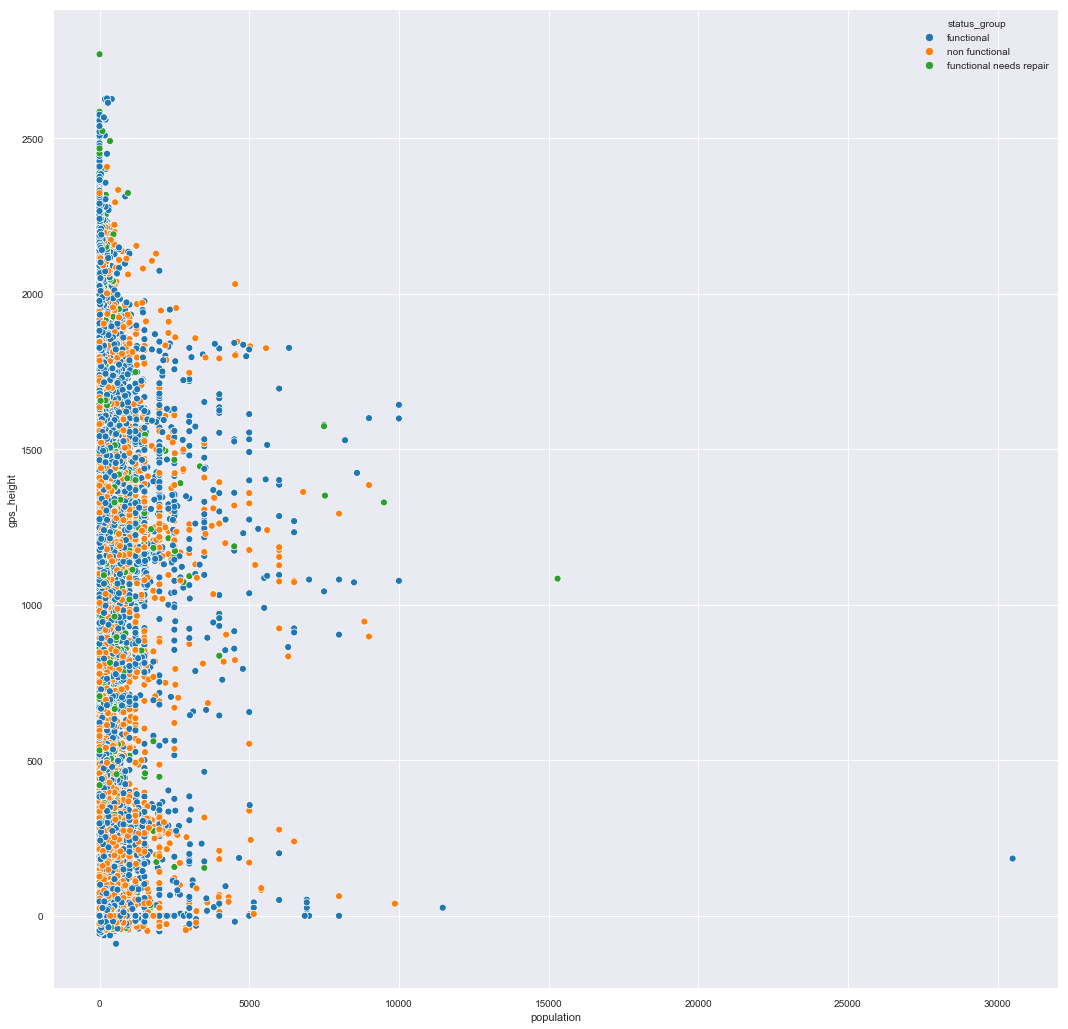

In [245]:
#sns.jointplot(y=well_data["gps_height"],x=well_data["population"],data=well_data, hue="status_group")

#sns.pairplot(well_data[["gps_height","population"]], hue=well_data["status_group"])
fig,axes = plt.pyplot.subplots(figsize=(18,18))
sns.scatterplot(y=well_data["gps_height"],x=well_data["population"],hue=well_data["status_group"])

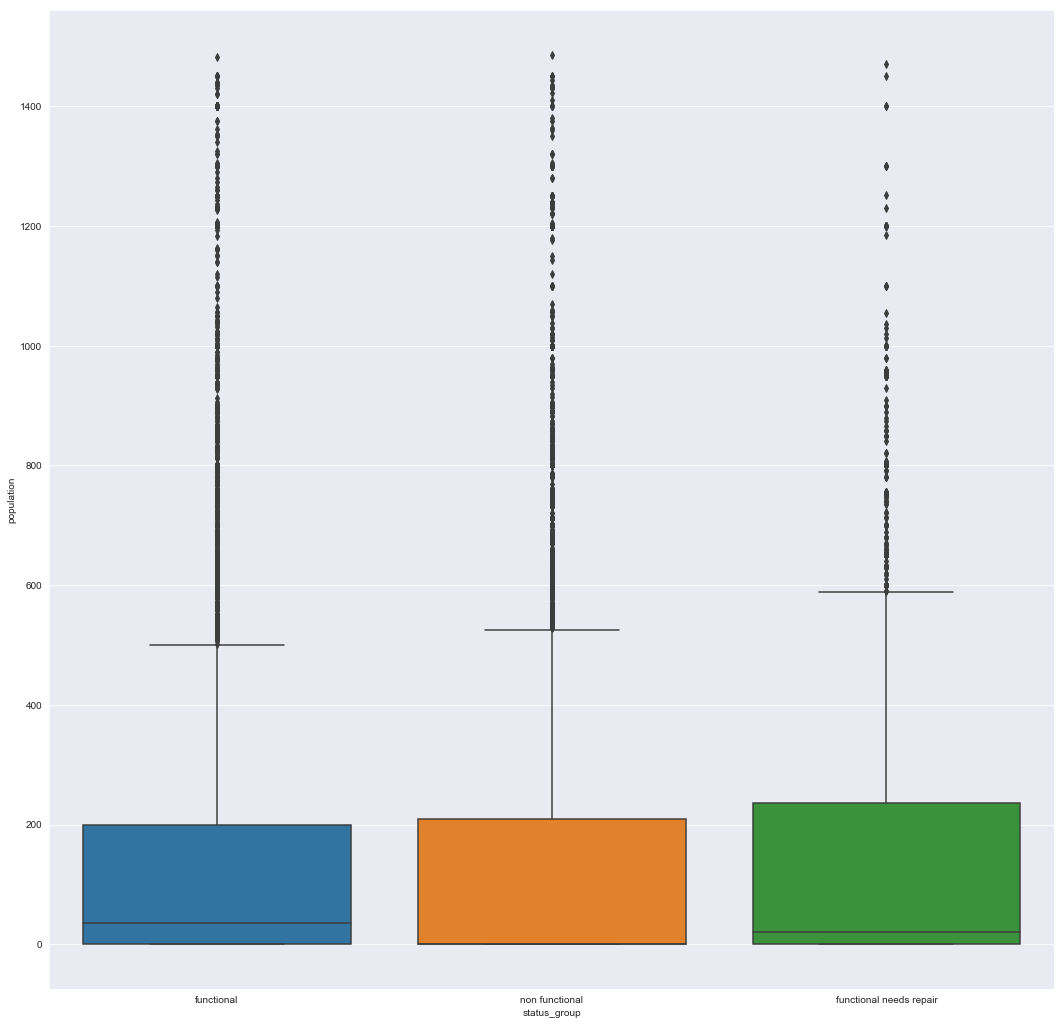

In [66]:
#this outlier is ruining the whole graph so lets kick it out for the sake of this graph
#find it

graph = well_data[well_data['population']<1500]

fig,axes = plt.pyplot.subplots(figsize=(18,18))
#sns.scatterplot(y=graph["gps_height"],x=graph["population"],hue=graph["status_group"])

sns.boxplot(y=graph["population"],x=graph["status_group"])

In [63]:
# Why is everything at the bottom?
well_data['population'].value_counts()
# Turns out there's a ton of zero values
# Is there a co-relation between non-functional andamount of zero populations? Needto figure out population in termsofpercentage
# that will be a pain


0       21381
1        7025
200      1940
150      1892
250      1681
300      1476
100      1146
50       1139
500      1009
350       986
120       916
400       775
60        706
30        626
40        552
80        533
450       499
20        462
600       438
230       388
75        289
1000      278
800       269
90        265
130       264
25        255
320       249
35        245
360       222
140       215
        ...  
8848        1
628         1
4520        1
468         1
693         1
725         1
789         1
821         1
5300        1
3127        1
2345        1
3031        1
886         1
392         1
424         1
2807        1
726         1
694         1
2569        1
4788        1
662         1
4660        1
406         1
1032        1
1160        1
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

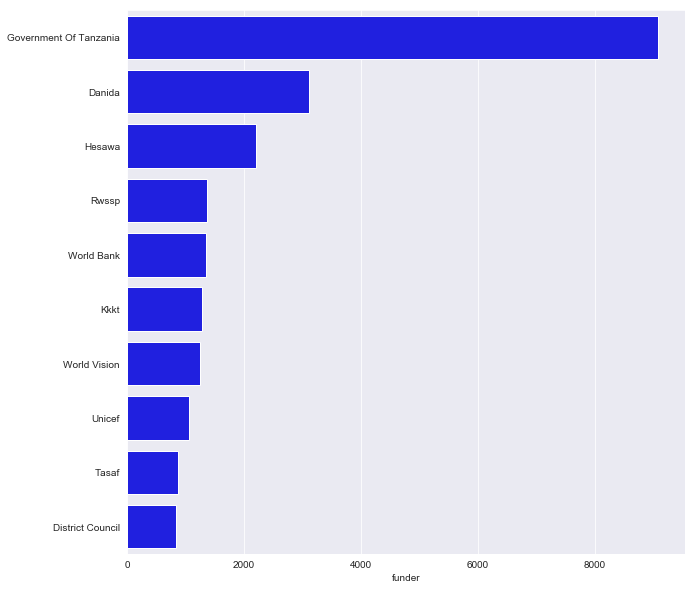

In [219]:
fig,axes = plt.subplots(figsize=(10,10))

funder_count = well_data['funder'].value_counts().iloc[:10]

yup = sns.barplot(y=funder_count.index, x=funder_count,color='blue')

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



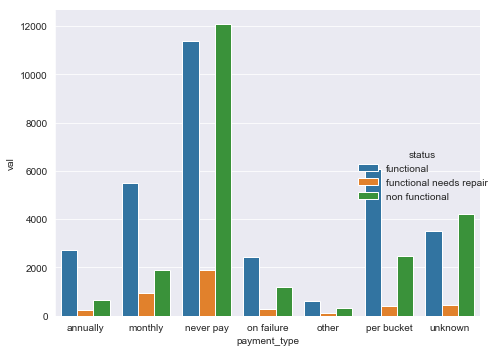

In [343]:
# Let's see how much payment type effects it
#fig,axes = plt.subplots(figsize=(20,5))

# HOWTHEFUCK


pay_stat_data = well_data.groupby('payment_type')['status_group'].value_counts()

pay_stat_data = pd.DataFrame(data=pay_stat_data)

pay_stat_data.columns = ['count']

groups = pay_stat_data.index.levels[0]
means = pay_stat_data.index.levels[1]
index = pd.MultiIndex.from_product(
    [groups, means], 
   names=['payment_type', 'status']
)

values = pay_stat_data['count']
data = pd.DataFrame(data={'val': values}, index=index).reset_index()

sns.factorplot(x='payment_type', y='val', hue='status', data=data, kind='bar')

plt.tight_layout()


In [ ]:
#It's probably more helpful to look at percentages

# Modelling
+ Split data
+ Test Different models
+ 